In [52]:
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import csv
from wordcloud import WordCloud
from collections import Counter

In [53]:
# 텍스트 파일 28부터 100까지 불러오기
lines2 = []
for i in range(28, 100):
    if i==54:
        i = i+1
    f = open("../피싱 사례 텍스트 파일/case0"+str(i)+".txt", 'r')
    lines = f.readlines()
    lines2 = lines2 + lines # 28~100번 까지의 텍스트 파일
    f.close()

In [54]:
# 텍스트 파일 101부터 142까지 불러오기
for i in range(100, 143):
    if i==137:
        i = i+1
    f = open("../피싱 사례 텍스트 파일/case"+str(i)+".txt", 'r')
    lines = f.readlines()
    lines2 = lines2 + lines
    f.close()

In [55]:
# 텍스트 전문 소문자로 변환 --> for문 이용
ff = []
for i in range(0, len(lines2)):
    ff1 = lines2[i].lower()
    ff.append(ff1)

In [56]:
# 텍스트 파일의 전체 list 원소들 중에 '\n'이 있을 시, 제거!
i=0
while i<len(ff):
    if ff[i]=='\n':
        del ff[i]
        i = i-1
    i = i+1

In [57]:
tokenizer = RegexpTokenizer('[\w]+')

In [58]:
stop_words = stopwords.words('english')

In [59]:
# 소문자 변환 및 공백 제거한 리스트들을 이용하여 전부 토큰화!
test = []
ff_c = ff
for i in range(len(ff_c)) :
    tokens = tokenizer.tokenize(ff[i])
    test1 = tokens
    test = test + test1

In [60]:
# 관사 없애기 --> a, an, the
# 일반 알파벳 없애기 [a-z]
# to, of, and, in, that, is, for 없애기 (--> top10에 존재!)

In [61]:
# 1) 알파벳 제거
i=0
while i<len(test):
    if test[i]=='a' or test[i]=='b' or test[i]=='c' or test[i]=='d' or test[i]=='e' or test[i]=='f' or test[i]=='g' or test[i]=='h' or test[i]=='i' or test[i]=='j' or test[i]=='k' or test[i]=='l' or test[i]=='m' or test[i]=='n' or test[i]=='o' or test[i]=='p' or test[i]=='q' or test[i]=='r' or test[i]=='s' or test[i]=='t' or test[i]=='u' or test[i]=='v' or test[i]=='w' or test[i]=='x' or test[i]=='y' or test[i]=='z':
        del test[i]
        i = i-1
    i = i+1

In [62]:
# emails --> email
i=0
while i<len(test):
    if test[i]=='emails':
        test[i] = 'email'
        i = i-1
    i = i+1

In [63]:
p3 = re.compile('[0-9]')
i=0
while i<len(test):
    m = p3.match(test[i])
    if not str(m)=='None': 
        del test[i]
        i = i-1
    i = i+1

In [64]:
# messages --> message
i=0
while i<len(test):
    if test[i]=='messages':
        test[i] = 'message'
        i = i-1
    i = i+1

In [65]:
# companies --> company
i=0
while i<len(test):
    if test[i]=='companies':
        test[i] = 'company'
        i = i-1
    i = i+1

In [66]:
# organizations --> organization
i=0
while i<len(test):
    if test[i]=='organizations':
        test[i] = 'organization'
        i = i-1
    i = i+1

In [67]:
# apps --> app
i=0
while i<len(test):
    if test[i]=='apps':
        test[i] = 'app'
        i = i-1
    i = i+1

In [68]:
# high --> high-ranking
i=0
while i<len(test):
    if test[i]=='high':
        test[i] = 'high-ranking'
        i = i-1
    i = i+1

In [69]:
# devices --> device
i=0
while i<len(test):
    if test[i]=='devices':
        test[i] = 'device'
        i = i-1
    i = i+1

In [70]:
# targeted --> targeting
i=0
while i<len(test):
    if test[i]=='targeted':
        test[i] = 'targeting'
        i = i-1
    i = i+1

In [71]:
# scams --> scam
i=0
while i<len(test):
    if test[i]=='scams':
        test[i] = 'scam'
        i = i-1
    i = i+1

In [72]:
# spoofed --> spoofing
i=0
while i<len(test):
    if test[i]=='spoofed':
        test[i] = 'spoofing'
        i = i-1
    i = i+1

In [73]:
# applications --> application
i=0
while i<len(test):
    if test[i]=='applications':
        test[i] = 'application'
        i = i-1
    i = i+1

In [74]:
# 월 삭제
i=0
while i<len(test):
    if test[i]=='january' or \
    test[i]=='february' or \
    test[i]=='march' or \
    test[i]=='april' or \
    test[i]=='may' or \
    test[i]=='june' or \
    test[i]=='july' or \
    test[i]=='august' or \
    test[i]=='september' or \
    test[i]=='october' or \
    test[i]=='november' or \
    test[i]=='december':
        del test[i]
        i = i-1
    i = i+1

In [75]:
# 숫자 삭제
i=0
while i<len(test):
    if test[i]=='one' or \
    test[i]=='two' or \
    test[i]=='three' or \
    test[i]=='four' or \
    test[i]=='five' or \
    test[i]=='six' or \
    test[i]=='seven' or \
    test[i]=='eight' or \
    test[i]=='nine' or \
    test[i]=='ten' or \
    test[i]=='zero' or \
    test[i]=='hundreds' or \
    test[i]=='thousands' or \
    test[i]=='hundred' or \
    test[i]=='thousand' or \
    test[i]=='million':
        del test[i]
        i = i-1
    i = i+1

In [76]:
# 2) 관사 조사 등 불용어 제거
i=0
while i<len(test):
    if test[i]=='the' or \
    test[i]=='to' or \
    test[i]=='of' or \
    test[i]=='and' or \
    test[i]=='in' or \
    test[i]=='that' or \
    test[i]=='is' or \
    test[i]=='for' or \
    test[i]=='on' or \
    test[i]=='with' or \
    test[i]=='this' or \
    test[i]=='as' or \
    test[i]=='it' or \
    test[i]=='are' or \
    test[i]=='an' or \
    test[i]=='said' or \
    test[i]=='they' or \
    test[i]=='from' or \
    test[i]=='their' or \
    test[i]=='by' or \
    test[i]=='be' or \
    test[i]=='or' or \
    test[i]=='have' or \
    test[i]=='was' or \
    test[i]=='which' or \
    test[i]=='at' or \
    test[i]=='has' or \
    test[i]=='also' or \
    test[i]=='used' or \
    test[i]=='can' or \
    test[i]=='using' or \
    test[i]=='new' or \
    test[i]=='campaign' or \
    test[i]=='users' or \
    test[i]=='security' or \
    test[i]=='victims' or \
    test[i]=='page' or \
    test[i]=='were' or \
    test[i]=='these' or \
    test[i]=='information' or \
    test[i]=='attack' or \
    test[i]=='attacks' or \
    test[i]=='researchers' or \
    test[i]=='malicious' or \
    test[i]=='threat' or \
    test[i]=='credentials' or \
    test[i]=='user' or \
    test[i]=='attackers' or \
    test[i]=='more' or \
    test[i]=='not' or \
    test[i]=='we' or \
    test[i]=='use' or \
    test[i]=='other' or \
    test[i]=='one' or \
    test[i]=='into' or \
    test[i]=='been' or \
    test[i]=='legitimate' or \
    test[i]=='them' or \
    test[i]=='according' or \
    test[i]=='but' or \
    test[i]=='file' or \
    test[i]=='if' or \
    test[i]=='you' or \
    test[i]=='out' or \
    test[i]=='data' or \
    test[i]=='its' or \
    test[i]=='read' or \
    test[i]=='so' or \
    test[i]=='up' or \
    test[i]=='like' or \
    test[i]=='such' or \
    test[i]=='campaigns' or \
    test[i]=='then' or \
    test[i]=='sent' or \
    test[i]=='will' or \
    test[i]=='all' or \
    test[i]=='he' or \
    test[i]=='being' or \
    test[i]=='services' or \
    test[i]=='threatpost' or \
    test[i]=='365' or \
    test[i]=='when' or \
    test[i]=='who' or \
    test[i]=='minute' or \
    test[i]=='he' or \
    test[i]=='about' or \
    test[i]=='over' or \
    test[i]=='actors' or \
    test[i]=='victim' or \
    test[i]=='first' or \
    test[i]=='customers' or \
    test[i]=='percent' or \
    test[i]=='document' or \
    test[i]=='steal' or \
    test[i]=='make' or \
    test[i]=='many' or \
    test[i]=='pm' or \
    test[i]=='our' or \
    test[i]=='point' or \
    test[i]=='uses' or \
    test[i]=='tactics' or \
    test[i]=='tactic' or \
    test[i]=='recent' or \
    test[i]=='likely' or \
    test[i]=='once' or \
    test[i]=='check' or \
    test[i]=='malware' or \
    test[i]=='many' or \
    test[i]=='pm' or \
    test[i]=='our' or \
    test[i]=='point' or \
    test[i]=='uses' or \
    test[i]=='tactics' or \
    test[i]=='tactic' or \
    test[i]=='recent'or \
    test[i]=='link' or \
    test[i]=='account' or \
    test[i]=='share' or \
    test[i]=='domain' or \
    test[i]=='article' or \
    test[i]=='author' or \
    test[i]=='report' or \
    test[i]=='links' or \
    test[i]=='access' or \
    test[i]=='site' or \
    test[i]=='website' or \
    test[i]=='there' or \
    test[i]=='login' or \
    test[i]=='wrote' or \
    test[i]=='accounts' or \
    test[i]=='including' or \
    test[i]=='click' or \
    test[i]=='well' or \
    test[i]=='would' or \
    test[i]=='could' or \
    test[i]=='people' or \
    test[i]=='than' or \
    test[i]=='group' or \
    test[i]=='address' or \
    test[i]=='attacker' or \
    test[i]=='based' or \
    test[i]=='domains' or \
    test[i]=='web' or \
    test[i]=='sites' or \
    test[i]=='what' or \
    test[i]=='most' or \
    test[i]=='com' or \
    test[i]=='any' or \
    test[i]=='via' or \
    test[i]=='fake' or \
    test[i]=='service' or \
    test[i]=='those' or \
    test[i]=='landing' or \
    test[i]=='code' or \
    test[i]=='actor' or \
    test[i]=='how' or \
    test[i]=='some' or \
    test[i]=='told' or \
    test[i]=='number' or \
    test[i]=='while' or \
    test[i]=='time' or \
    test[i]=='however' or \
    test[i]=='name' or \
    test[i]=='even' or \
    test[i]=='password' or \
    test[i]=='because' or \
    test[i]=='through' or \
    test[i]=='found' or \
    test[i]=='noted' or \
    test[i]=='year' or \
    test[i]=='files' or \
    test[i]=='after' or \
    test[i]=='compromised' or \
    test[i]=='see' or \
    test[i]=='known' or \
    test[i]=='url' or \
    test[i]=='re' or \
    test[i]=='pages' or \
    test[i]=='explained' or \
    test[i]=='system' or \
    test[i]=='only' or \
    test[i]=='get' or \
    test[i]=='just' or \
    test[i]=='cybercriminals' or \
    test[i]=='another' or \
    test[i]=='different' or \
    test[i]=='financial' or \
    test[i]=='same' or \
    test[i]=='take' or \
    test[i]=='added' or \
    test[i]=='server' or \
    test[i]=='real' or \
    test[i]=='example' or \
    test[i]=='your' or \
    test[i]=='download' or \
    test[i]=='websites' or \
    test[i]=='discovered' or \
    test[i]=='last' or \
    test[i]=='post' or \
    test[i]=='research' or \
    test[i]=='within' or \
    test[i]=='observed' or \
    test[i]=='way' or \
    test[i]=='am' or \
    test[i]=='lures' or \
    test[i]=='had' or \
    test[i]=='platform' or \
    test[i]=='now' or \
    test[i]=='various' or \
    test[i]=='credential' or \
    test[i]=='detection' or \
    test[i]=='top' or \
    test[i]=='personal' or \
    test[i]=='proofpoint' or \
    test[i]=='payment' or \
    test[i]=='activity' or \
    test[i]=='lindsey' or \
    test[i]=='before' or \
    test[i]=='where' or \
    test[i]=='order' or \
    test[i]=='both' or \
    test[i]=='source' or \
    test[i]=='around' or \
    test[i]=='trick' or \
    test[i]=='part' or \
    test[i]=='further' or \
    test[i]=='very' or \
    test[i]=='against' or \
    test[i]=='open' or \
    test[i]=='past' or \
    test[i]=='systems' or \
    test[i]=='do' or \
    test[i]=='donnell' or \
    test[i]=='remote' or \
    test[i]=='authentication' or \
    test[i]=='sender' or \
    test[i]=='send' or \
    test[i]=='related' or \
    test[i]=='several' or \
    test[i]=='passwords' or \
    test[i]=='recently' or \
    test[i]=='clicking' or \
    test[i]=='his' or \
    test[i]=='lure' or \
    test[i]=='sensitive' or \
    test[i]=='addresses' or \
    test[i]=='content' or \
    test[i]=='details' or \
    test[i]=='seen' or \
    test[i]=='kit' or \
    test[i]=='work' or \
    test[i]=='set' or \
    test[i]=='urls' or \
    test[i]=='kits' or \
    test[i]=='continue' or \
    test[i]=='no' or \
    test[i]=='should' or \
    test[i]=='team' or \
    test[i]=='since' or \
    test[i]=='appear' or \
    test[i]=='names' or \
    test[i]=='techniques' or \
    test[i]=='hosted' or \
    test[i]=='tools' or \
    test[i]=='march' or \
    test[i]=='instance' or \
    test[i]=='university' or \
    test[i]=='between' or \
    test[i]=='behind' or \
    test[i]=='network' or \
    test[i]=='without' or \
    test[i]=='find' or \
    test[i]=='really' or \
    test[i]=='recipient' or \
    test[i]=='appears' or \
    test[i]=='potential' or \
    test[i]=='similar' or \
    test[i]=='look' or \
    test[i]=='sharepoint' or \
    test[i]=='stealing' or \
    test[i]=='control' or \
    test[i]=='need' or \
    test[i]=='often' or \
    test[i]=='down' or \
    test[i]=='include' or \
    test[i]=='week' or \
    test[i]=='recipients' or \
    test[i]=='documents' or \
    test[i]=='technique' or \
    test[i]=='associated' or \
    test[i]=='active' or \
    test[i]=='much' or \
    test[i]=='update' or \
    test[i]=='software' or \
    test[i]=='method' or \
    test[i]=='firm' or \
    test[i]=='secure' or \
    test[i]=='additional' or \
    test[i]=='ongoing' or \
    test[i]=='universities' or \
    test[i]=='think' or \
    test[i]=='day' or \
    test[i]=='large' or \
    test[i]=='ransomware' or \
    test[i]=='might' or \
    test[i]=='able' or \
    test[i]=='did' or \
    test[i]=='making' or \
    test[i]=='type' or \
    test[i]=='button' or \
    test[i]=='instead' or \
    test[i]=='browser' or \
    test[i]=='back' or \
    test[i]=='redirected' or \
    test[i]=='don' or \
    test[i]=='end' or \
    test[i]=='shows' or \
    test[i]=='called' or \
    test[i]=='sign' or \
    test[i]=='compromise' or \
    test[i]=='intelligence' or \
    test[i]=='included' or \
    test[i]=='asking' or \
    test[i]=='apt' or \
    test[i]=='html' or \
    test[i]=='unique' or \
    test[i]=='form' or \
    test[i]=='specific' or \
    test[i]=='created' or \
    test[i]=='us' or \
    test[i]=='bad' or \
    test[i]=='free' or \
    test[i]=='internet' or \
    test[i]=='popular' or \
    test[i]=='level' or \
    test[i]=='either' or \
    test[i]=='attempts' or \
    test[i]=='device' or \
    test[i]=='looking' or \
    test[i]=='asked' or \
    test[i]=='multiple' or \
    test[i]=='advantage' or \
    test[i]=='avoid' or \
    test[i]=='third' or \
    test[i]=='initial' or \
    test[i]=='come' or \
    test[i]=='text' or \
    test[i]=='stolen' or \
    test[i]=='cofense' or \
    test[i]=='payload' or \
    test[i]=='help' or \
    test[i]=='during' or \
    test[i]=='taking' or \
    test[i]=='brand' or \
    test[i]=='protect' or \
    test[i]=='create' or \
    test[i]=='attachment' or \
    test[i]=='process' or \
    test[i]=='warned' or \
    test[i]=='script' or \
    test[i]=='world' or \
    test[i]=='still' or \
    test[i]=='suspicious' or \
    test[i]=='know' or \
    test[i]=='across' or \
    test[i]=='second' or \
    test[i]=='case' or \
    test[i]=='allows' or \
    test[i]=='due' or \
    test[i]=='profile' or \
    test[i]=='kaspersky' or \
    test[i]=='windows' or \
    test[i]=='host' or \
    test[i]=='full' or \
    test[i]=='employees' or \
    test[i]=='health' or \
    test[i]=='includes' or \
    test[i]=='actually' or \
    test[i]=='identified' or \
    test[i]=='sending' or \
    test[i]=='hackers' or \
    test[i]=='researcher' or \
    test[i]=='javascript' or \
    test[i]=='far' or \
    test[i]=='already' or \
    test[i]=='criminals' or \
    test[i]=='possible' or \
    test[i]=='verify' or \
    test[i]=='wednesday' or \
    test[i]=='leveraging' or \
    test[i]=='operation' or \
    test[i]=='scammers' or \
    test[i]=='vulnerability' or \
    test[i]=='available' or \
    test[i]=='subject' or \
    test[i]=='something' or \
    test[i]=='common' or \
    test[i]=='lookout' or \
    test[i]=='bec' or \
    test[i]=='c2' or \
    test[i]=='here' or \
    test[i]=='comes' or \
    test[i]=='gain' or \
    test[i]=='next' or \
    test[i]=='ve' or \
    test[i]=='previously' or \
    test[i]=='cyber' or \
    test[i]=='encrypted' or \
    test[i]=='factor' or \
    test[i]=='least' or \
    test[i]=='recaptcha' or \
    test[i]=='party' or \
    test[i]=='increase' or \
    test[i]=='convincing' or \
    test[i]=='global' or \
    test[i]=='media' or \
    test[i]=='means' or \
    test[i]=='lot' or \
    test[i]=='request' or \
    test[i]=='believe' or \
    test[i]=='latest' or \
    test[i]=='few' or \
    test[i]=='half' or \
    test[i]=='storage' or \
    test[i]=='linked' or \
    test[i]=='red' or \
    test[i]=='particular' or \
    test[i]=='armorblox' or \
    test[i]=='designed' or \
    test[i]=='each' or \
    test[i]=='execute' or \
    test[i]=='going' or \
    test[i]=='years' or \
    test[i]=='fact' or \
    test[i]=='drive' or \
    test[i]=='always' or \
    test[i]=='easy' or \
    test[i]=='tool' or \
    test[i]=='themed' or \
    test[i]=='fraud' or \
    test[i]=='exe' or \
    test[i]=='asks' or \
    test[i]=='own' or \
    test[i]=='macos' or \
    test[i]=='thursday' or \
    test[i]=='contained' or \
    test[i]=='action' or \
    test[i]=='permissions' or \
    test[i]=='august' or \
    test[i]=='attempt' or \
    test[i]=='deliver' or \
    test[i]=='resources' or \
    test[i]=='development' or \
    test[i]=='successful' or \
    test[i]=='reported' or \
    test[i]=='provide' or \
    test[i]=='become' or \
    test[i]=='contact' or \
    test[i]=='technology' or \
    test[i]=='operations' or \
    test[i]=='tara' or \
    test[i]=='allow' or \
    test[i]=='launch' or \
    test[i]=='version' or \
    test[i]=='earlier' or \
    test[i]=='three' or \
    test[i]=='word' or \
    test[i]=='directory' or \
    test[i]=='variant' or \
    test[i]=='downloaded' or \
    test[i]=='person' or \
    test[i]=='every' or \
    test[i]=='enter' or \
    test[i]=='under' or \
    test[i]=='cybersecurity' or \
    test[i]=='filters' or \
    test[i]=='response' or \
    test[i]=='contain' or \
    test[i]=='support' or \
    test[i]=='getting' or \
    test[i]=='corporate' or \
    test[i]=='http' or \
    test[i]=='potentially' or \
    test[i]=='platforms' or \
    test[i]=='leverage' or \
    test[i]=='working' or \
    test[i]=='seals' or \
    test[i]=='ip' or \
    test[i]=='tuesday' or \
    test[i]=='highly' or \
    test[i]=='chain' or \
    test[i]=='servers' or \
    test[i]=='effective' or \
    test[i]=='call' or \
    test[i]=='say' or \
    test[i]=='bypass' or \
    test[i]=='attachments' or \
    test[i]=='xero' or \
    test[i]=='private' or \
    test[i]=='started' or \
    test[i]=='opening' or \
    test[i]=='scale' or \
    test[i]=='contains' or \
    test[i]=='ways' or \
    test[i]=='trusted' or \
    test[i]=='https' or \
    test[i]=='feature' or \
    test[i]=='clicks' or \
    test[i]=='hosting' or \
    test[i]=='view' or \
    test[i]=='log' or \
    test[i]=='trend' or \
    test[i]=='zix' or \
    test[i]=='trust' or \
    test[i]=='fraudulent' or \
    test[i]=='portal' or \
    test[i]=='types' or \
    test[i]=='impersonating' or \
    test[i]=='containing' or \
    test[i]=='important' or \
    test[i]=='senior' or \
    test[i]=='clicked' or \
    test[i]=='hit' or \
    test[i]=='key' or \
    test[i]=='never' or \
    test[i]=='long' or \
    test[i]=='breach' or \
    test[i]=='especially' or \
    test[i]=='makes' or \
    test[i]=='original' or \
    test[i]=='want' or \
    test[i]=='threats' or \
    test[i]=='released' or \
    test[i]=='go' or \
    test[i]=='php' or \
    test[i]=='she' or \
    test[i]=='controls' or \
    test[i]=='evade' or \
    test[i]=='seems' or \
    test[i]=='products' or \
    test[i]=='saw' or \
    test[i]=='kind' or \
    test[i]=='months' or \
    test[i]=='registered' or \
    test[i]=='statement' or \
    test[i]=='comment' or \
    test[i]=='effort' or \
    test[i]=='off' or \
    test[i]=='too' or \
    test[i]=='nimzaloader' or \
    test[i]=='list' or \
    test[i]=='contacts' or \
    test[i]=='language' or \
    test[i]=='risk' or \
    test[i]=='event' or \
    test[i]=='date' or \
    test[i]=='delivery' or \
    test[i]=='simple' or \
    test[i]=='actual' or \
    test[i]=='month' or \
    test[i]=='rather' or \
    test[i]=='execution' or \
    test[i]=='warning' or \
    test[i]=='sparrow' or \
    test[i]=='attached' or \
    test[i]=='downloads' or \
    test[i]=='state' or \
    test[i]=='interest' or \
    test[i]=='customer' or \
    test[i]=='harvesting' or \
    test[i]=='computer' or \
    test[i]=='among' or \
    test[i]=='test' or \
    test[i]=='phish' or \
    test[i]=='giving' or \
    test[i]=='infected' or \
    test[i]=='command' or \
    test[i]=='human' or \
    test[i]=='says' or \
    test[i]=='numbers' or \
    test[i]=='elizabeth' or \
    test[i]=='united' or \
    test[i]=='made' or \
    test[i]=='sms' or \
    test[i]=='individuals' or \
    test[i]=='silver' or \
    test[i]=='custom' or \
    test[i]=='awareness' or \
    test[i]=='upon' or \
    test[i]=='massive' or \
    test[i]=='wordpress' or \
    test[i]=='spotted' or \
    test[i]=='industries' or \
    test[i]=='leveraged' or \
    test[i]=='place' or \
    test[i]=='again' or \
    test[i]=='great' or \
    test[i]=='methods' or \
    test[i]=='invoice' or \
    test[i]=='aimed' or \
    test[i]=='rat' or \
    test[i]=='current' or \
    test[i]=='critical' or \
    test[i]=='simply' or \
    test[i]=='package' or \
    test[i]=='montalbano' or \
    test[i]=='best' or \
    test[i]=='put' or \
    test[i]=='things' or \
    test[i]=='single' or \
    test[i]=='isn' or \
    test[i]=='others' or \
    test[i]=='small' or \
    test[i]=='provider' or \
    test[i]=='taken' or \
    test[i]=='sharing' or \
    test[i]=='published' or \
    test[i]=='uncovered' or \
    test[i]=='vector' or \
    test[i]=='creating' or \
    test[i]=='dridex' or \
    test[i]=='enough' or \
    test[i]=='non' or \
    test[i]=='stage' or \
    test[i]=='does' or \
    test[i]=='adversary' or \
    test[i]=='director':
        del test[i]
        i = i-1
    i = i+1

In [77]:
# 기업 관련
i=0
while i<len(test):
    if test[i]=='organization' or \
    test[i]=='microsoft' or \
    test[i]=='google' or \
    test[i]=='office' or \
    test[i]=='facebook' or \
    test[i]=='company' or \
    test[i]=='apple' or \
    test[i]=='business' or \
    test[i]=='infrastructure' or \
    test[i]=='android' or \
    test[i]=='amazon' or \
    test[i]=='netflix' or \
    test[i]=='docusign' or \
    test[i]=='linkedin' or \
    test[i]=='teams' or \
    test[i]=='instagram' or \
    test[i]=='webex' or \
    test[i]=='enterprise' or \
    test[i]=='gmail' or \
    test[i]=='onenote' or \
    test[i]=='docs' or \
    test[i]=='tiktok' or \
    test[i]=='paypal' or \
    test[i]=='cisco' or \
    test[i]=='firebase':
        del test[i]
        i = i-1
    i = i+1

In [78]:
# 타겟팅화된 / 고위관직
i=0
while i<len(test):
    if test[i]=='analysis' or \
    test[i]=='targeted' or \
    test[i]=='targeting' or \
    test[i]=='targets' or \
    test[i]=='target' or \
    test[i]=='government' or \
    test[i]=='sophisticated' or \
    test[i]=='high-ranking' or \
    test[i]=='public':
        del test[i]
        i = i-1
    i = i+1

In [79]:
# 산업 종류 별
i=0
while i<len(test):
    if test[i]=='engineering' or \
    test[i]=='medical' or \
    test[i]=='marketing' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='':
        del test[i]
        i = i-1
    i = i+1

In [80]:
# sns 공격
i=0
while i<len(test):
    if test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='social' or \
    test[i]=='' or \
    test[i]=='cloud' or \
    test[i]=='mail':
        del test[i]
        i = i-1
    i = i+1

In [81]:
# 공격 종류 별
i=0
while i<len(test):
    if test[i]=='phishing' or \
    test[i]=='email' or \
    test[i]=='scam' or \
    test[i]=='spoofing' or \
    test[i]=='spear' or \
    test[i]=='trojan' or \
    test[i]=='spam' or \
    test[i]=='captcha' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='':
        del test[i]
        i = i-1
    i = i+1

In [82]:
# covid-19
i=0
while i<len(test):
    if test[i]=='covid' or \
    test[i]=='online' or \
    test[i]=='pandemic' or \
    test[i]=='coronavirus' or \
    test[i]=='vaccine' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='':
        del test[i]
        i = i-1
    i = i+1

In [83]:
# 모바일 피싱
i=0
while i<len(test):
    if test[i]=='message' or \
    test[i]=='app' or \
    test[i]=='mobile' or \
    test[i]=='application' or \
    test[i]=='phone' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='':
        del test[i]
        i = i-1
    i = i+1

In [84]:
# 금융 관련 피싱
i=0
while i<len(test):
    if test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='' or \
    test[i]=='':
        del test[i]
        i = i-1
    i = i+1

In [85]:
pd.Series(test).value_counts().head(20)

banking         60
credit          38
card            37
bank            36
money           19
quickly         18
why             18
joomla          18
field           18
interesting     18
multi           18
increasingly    18
spread          18
macros          18
executives      18
themselves      18
along           18
typically       18
employee        18
evidence        18
dtype: int64

In [86]:
font_path = 'Playball-Regular.ttf'

In [87]:
wordcloud = WordCloud( \
                     font_path = font_path, \
                     width = 800, \
                     height = 800, \
                     background_color = "white" \
                     )

In [88]:
count = Counter(test)

In [89]:
wordcloud = wordcloud.generate_from_frequencies(count)

In [90]:
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word Cloud image as numpy matrix
    """
    return self.to_array()

def to_array(Self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word Cloud image as numpy matrix
    """
    return wordcloud.to_array()
array = wordcloud.to_array()

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt

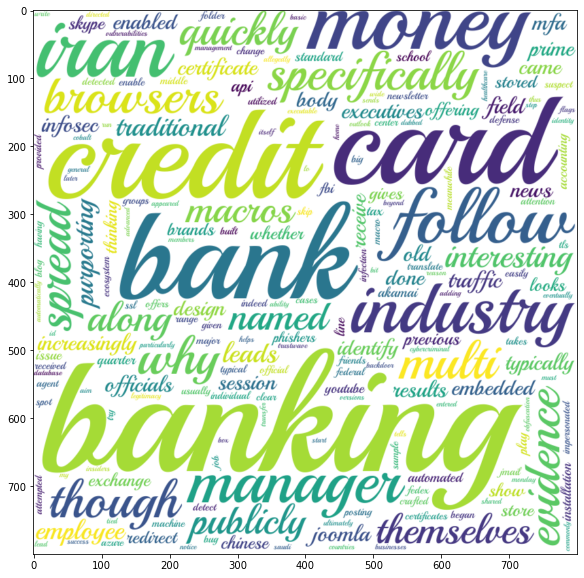

In [92]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud.png')